# Improvement in precision

In [17]:
import numpy as np

def f2wl(val,val_unc = 0):
# % Converts wavlength to frequency, and vice versa, with (absolute) uncertainty 
# % The conversion is reciprocal, so this function converts both ways.
# %   Inputs:     Wavelength (or frequency) in meters (or Hz)
# %         (opt) Uncertainty (in same units)
# %   Outputs:    Frequency (or wavelength) in Hz (or m)
# %               Uncertainty (in same units) (iff also passed as input)

    c = 299792458
    f = c/val
    if val_unc is not None:
        df = c*val_unc/val**2
    return f,df


first_measurement_wl = 413.0938e-9
first_measurement_wl_unc = np.linalg.norm([0.002e-9,0.0009e-9])
# first_measurement_wl_unc = np.sum([0.002e-9,0.0009e-9])
first_measurement_f,first_measurement_f_unc=f2wl(first_measurement_wl,first_measurement_wl_unc)

second_measurement_f,second_measurement_f_unc = 725736700e6,np.linalg.norm([40e6,260e6])
# second_measurement_f,second_measurement_f_unc = 725736700e6,np.sum([40e6,260e6])
second_measurement_wl,second_measurement_wl_unc = f2wl(second_measurement_f,second_measurement_f_unc)


print('First measurement, MHz')
print(first_measurement_f/1e6,first_measurement_f_unc/1e6,first_measurement_f_unc/first_measurement_f)
print('First measurement, nm')
print(first_measurement_wl/1e6,first_measurement_wl_unc*1e9,first_measurement_wl_unc/first_measurement_wl)

print('\n')

print('Second measurement, MHz')
print(second_measurement_f/1e6,second_measurement_f_unc/1e6,second_measurement_f_unc/second_measurement_f)
print('Second measurement, nm')
print(second_measurement_wl*1e9,second_measurement_wl_unc*1e9,second_measurement_wl_unc/second_measurement_wl)
print('\n')

print('Uncertainty ratios: wl, freq')
print(first_measurement_wl_unc/second_measurement_wl_unc,first_measurement_f_unc/second_measurement_f_unc)





First measurement, MHz
725724903.1575879 3852.9723060559477 5.3091361331158455e-06
First measurement, nm
4.1309380000000003e-13 0.0021931712199461306 5.3091361331158455e-06


Second measurement, MHz
725736700.0 263.0589287593181 3.624715806150056e-07
Second measurement, nm
413.08708516463344 0.00014973232869127008 3.6247158061500553e-07


Uncertainty ratios: wl, freq
14.647279175549217 14.64680299668204


In [5]:

f1,_=f2wl(413.01e-9) 
f2,_=f2wl(413.17e-9)
(f1-f2)/1e9

281.093846394125

In [7]:
# WL precision
wl_unc = 200e-15
wl_unc/first_measurement_wl


4.841515413690546e-07

In [11]:
1e-6*first_measurement_f*wl_unc/first_measurement_wl

351.3608304736541

In [8]:
# with the WS8
wm_unc = 2e6

wm_unc/second_measurement_f

2.7558203960196584e-09

In [9]:
4.841515413690546e-07/2.7558203960196584e-09

175.6832709665456

# Level diagram

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


datafile = 'drake_levels/all_transitions.txt'

colnames = ['N', 'lower', 'upper', 'J_l', 'J_u', 'l_air', 'l_vac', 'unit', 'E_low', 'E_up', 'A_ul', 'SA_ul', 'f_lu',  'rat']
dtypes = {'N':int,
          'lower':str,
          'upper':str,
          'J_l':int,
          'J_u':int,
          'l_air':float,
          'l_vac':float,
          'unit':str,
          'E_low':float,
          'E_up':float,
          'A_ul':float,
          'SA_ul':float,
          'f_lu':float,
          'rat':float}
df = pd.read_csv(datafile)
df

,N,lower,upper,J_l,J_u,l_air,l_vac,unit,E_low,E_up,A_ul,SA_ul,f_lu,rat
0,1,1^1S,2^1P,0,1,NaN,584.334357,NaN,0.000000,171134.896946,1.798900e+09,1.800900e+09,2.761600e-01,1.0
1,2,1^1S,3^1P,0,1,NaN,537.029918,NaN,0.000000,186209.364940,5.663400e+08,5.799600e+08,7.343500e-02,1.0
2,3,1^1S,4^1P,0,1,NaN,522.213086,NaN,0.000000,191492.711909,2.435600e+08,2.522700e+08,2.986300e-02,1.0
3,4,1^1S,5^1P,0,1,NaN,515.616842,NaN,0.000000,193942.462294,1.258200e+08,1.311500e+08,1.504000e-02,1.0
4,5,1^1S,6^1P,0,1,NaN,512.098563,NaN,0.000000,195274.908466,7.317400e+07,7.657500e+07,8.627700e-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,935,10^3S,10^1P,1,1,NaN,70.856304,cm-1,197145.233258,197216.089562,2.725400e-04,1.678400e+07,8.140000e-08,NaN
2495,936,10^3P,10^1D,1,2,NaN,14.656262,cm-1,197198.333268,197212.989530,2.977000e-03,1.790300e+06,3.467500e-05,NaN
2496,936,10^3P,10^1D,2,2,NaN,14.656808,cm-1,197198.332722,197212.989530,1.059200e-03,1.790300e+06,7.402400e-06,NaN
2497,937,10^3D,10^1P,1,1,NaN,3.262439,cm-1,197212.827123,197216.089562,1.497700e-08,1.678400e+07,2.118300e-09,NaN


24.587306200300937

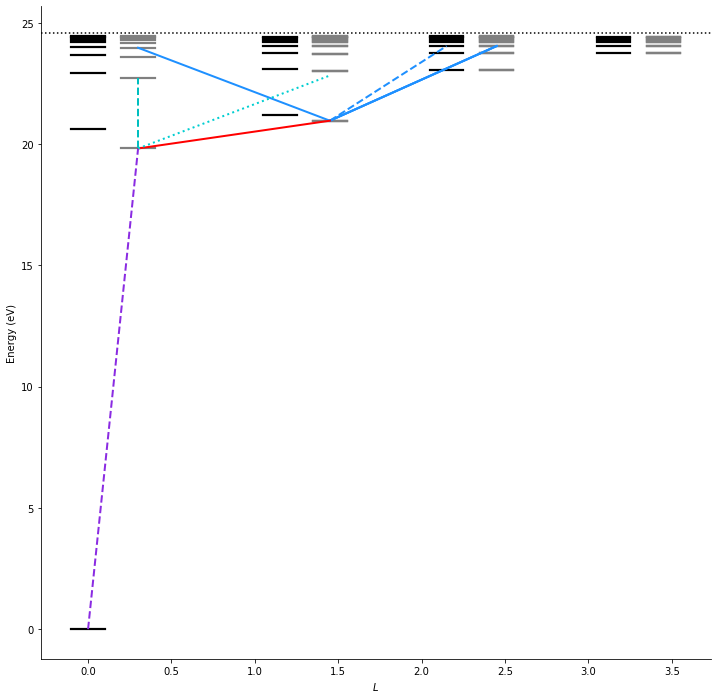

In [20]:
num_multiplets = 937

# We can be pretty rough for the first instance. Just need to find 
# the first instance of any multiplet as they'll be very similar

# and let's just look at the lower ones.. we can be very crude here


def wavenum2eV(E_in):
    E = E_in/8065.544
    return E

L_symbols = ['S','P','D','F','G','H','I']
L_values = {'S':0,'P':1,'D':2,'F':3,'G':4,'H':5,'I':6}
N_max = 10
L_max = 3
E_levels = {}

for n in range(N_max):
    for L in range(min(L_max+1,n+1)):
        for S in [1,3]:
            level_string = f'{n+1}^{S}{L_symbols[L]}'
            matched_lower = df[(df['lower']==level_string)]
            for J in range(L+2):
                full_string = f'{level_string}_{J}'
                matched_j = matched_lower[(matched_lower['J_l']==f'{J}')]

                E_levels[full_string]= {'N':n+1,
                                        'L':L,
                                         'S':(S-1)/2,
                                         'J':J,
                                         'E':np.mean(matched_j['E_low']),
                                         'E_std':np.std(matched_j['E_low']),
                                         'num':len(matched_j)
                                         }
#                 if E_levels[full_string]['E']>0:
                E = wavenum2eV(E_levels[full_string]['E'])
                E_levels[full_string]['E_ev'] = E
        
    
    
    
line_length = 0.25
spacing = 3*line_length/2

transitions = ['5^3D_1','5^3D_2','5^3D_3','5^1D_2','5^3S_1']
cool_line = ['2^3S_1','2^3P_2']
tuneout_levels = ['2^3P','3^3P'] 

def lvl2x(lvl):
    return lvl['L'] + lvl['S']*0.3 +(lvl['L']>0)*0.15
def wl2ev(l):
    h = 6.63e-34
    c = 299792458
    q = 1.6e-19
    return h*c/(l*q)
    
ionization_energy = wavenum2eV(198310)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
for lev in E_levels:
    if E_levels[lev]['S'] == 0: #singlets
        mfcolor = [0,0,0]
        sign = 0
    else:
        mfcolor = [1/2,1/2,1/2]
        sign = 1
    plt.plot(lvl2x(E_levels[lev]) + 0.2*np.array([-1,1])/2,
             E_levels[lev]['E_ev']*np.array([1,1]),
             color=mfcolor,linewidth=2.2)
    
tr_lw = 2

for tr in transitions:
    if tr == '5^1D_2':
        sty = '--'
    else:
        sty = '-'
    plt.plot([lvl2x(E_levels['2^3P_2']),lvl2x(E_levels[tr])],
                [E_levels['2^3P_2']['E_ev'],E_levels[tr]['E_ev']],
             'dodgerblue',linestyle=sty,linewidth=tr_lw)
    
plt.plot([lvl2x(E_levels[cool_line[0]]),lvl2x(E_levels[cool_line[1]])],
            [E_levels[cool_line[0]]['E_ev'],E_levels[cool_line[1]]['E_ev']],
         'r',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['1^1S_0']),lvl2x(E_levels['2^3S_1'])],
            [E_levels['1^1S_0']['E_ev'],E_levels['2^3S_1']['E_ev']],color='blueviolet',linestyle='--',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['2^3S_1']),lvl2x(E_levels['3^3S_1'])],
            [E_levels['2^3S_1']['E_ev'],E_levels['3^3S_1']['E_ev']],color='c',linestyle='--',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['2^3S_1']),lvl2x(E_levels['3^3P_1'])],
            [E_levels['2^3S_1']['E_ev'],E_levels['2^3S_1']['E_ev']+wl2ev(413e-9)],
             color='darkturquoise',linestyle=':',linewidth=tr_lw)
    
plt.axhline(ionization_energy,color='k',linestyle=':')    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('$L$')
plt.ylabel('Energy (eV)')

plt.savefig('lvl_diag_full_plot.svg')

plt.show()


        

# Harmonic approximation to Gaussian

The maximum velocity we observe is about 10 mm/sec. This can be used to find the max potential energy and thus the maximum excursion.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 6.64e-27
omega_mag = 420
v_max = 10e-3 # m/s
E = 0.5*m*v_max**2

x_max = v_max/(2*np.pi*omega_mag)

    
x_max = np.sqrt(2*E/m)/(2*np.pi*omega_mag)
print(f'Max displacement {x_max} m')


Max displacement 3.789403406949889e-06 m


In [9]:
np.power(x_max/1e-5,1)

0.3789403406949889

In [4]:
# consider the strongest trap, i.e. one where Omega_probe approx 10 Hz
# In our approximation this gives a value of
omega_probe = 10
epsilon = 8.85e-12
c = 299792458
beam_waist = 10e-6
Re_a_P = np.power(2*np.pi*omega_probe,2)*np.pi*m*c*epsilon*beam_waist**4
Re_a_P

2.184950801444931e-45

In [17]:
# So we have a form for the full dipole potential, roughly

$U = -\frac{1}{2\epsilon_0 c} \textrm{Re}(\alpha)\frac{2P}{\pi w_{0}^{2}}\exp\left(-\frac{1}{2}\left(\frac{y}{w_0}\right)^2\right)$

$U = -\frac{\textrm{Re}(\alpha)P}{\pi w_{0}^{2}\epsilon_0 c}\exp\left(-\frac{1}{2}\left(\frac{y}{w_0}\right)^2\right)$

another approach is to look at the change in gradient.
 
 $U = -\frac{1}{2\epsilon_0 c} \textrm{Re}(\alpha)\frac{2P}{\pi w_{0}^{2}}\exp\left(-\frac{1}{2}\left(\frac{y}{w_0}\right)^2\right)$

$d_y U =  -\frac{y}{w_{0}^2} U$

Whereas the gradient of the harmonic approx has the form
$d_y U_{approx} =   -\frac{4\textrm{Re}(\alpha)P}{\pi w_{0}^{4}\epsilon_0 c} y$

The relative error of the approximation in the force is 

$1- \frac{d_y U_{approx}}{d_y U} =  1-\frac{4\textrm{Re}(\alpha)P}{\pi w_{0}^{2}\epsilon_0 c} U^{-1}$
$ =  1-\exp\left(\frac{1}{2}\left(\frac{y}{w_0}\right)^2\right)$



In [58]:
1-np.exp(0.5*np.power((x_max/beam_waist),2))

-0.07443816838998596

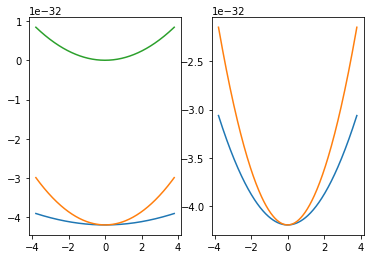

In [62]:
## Hmmm let's plot these

Y = np.linspace(-x_max,x_max,300)

U_approx = -Re_a_P/(np.pi*c*beam_waist**2*epsilon) + 2*Re_a_P/(np.pi*c*beam_waist**4*epsilon)*np.power(Y,2)
U_exact = -Re_a_P/(np.pi*c*beam_waist**2*epsilon)*np.exp(-0.5*np.power((Y/beam_waist),2))

U_mag = 0.5*m*np.power((omega_mag*Y),2)

plt.figure()
plt.subplot(121)
plt.plot(1e6*Y,U_exact)
plt.plot(1e6*Y,U_approx)
plt.plot(1e6*Y,U_mag)
plt.subplot(122)
# plt.plot(Y,(U_exact-U_approx)/U_exact)
plt.plot(1e6*Y,U_exact+U_mag)
plt.plot(1e6*Y,U_approx+U_mag)
plt.show()

In [ ]:
# Well that's actually pretty catastrophic. But what does it do to the total potential?

In [48]:
wbar=2*np.pi*np.power(425**3+425**3+55**3,1/3)
h = 6.63e-34
hbar = 0.5*h/np.pi
kB = 1.3806e-23
N = 6e5
T_c = 0.94*hbar*wbar*np.power(N,1/3)/kB
T_c

2.0394496220818074e-06

## Bryce notes

Gradient often 37-75 H^2/Ghz. In Fig 4.5 it's about the former. So worst-case could be 2x what I used.
Waist 14 um.
gaussian sigma = 0.5* waist!?
Hes used 80mW and still got good agreement

Assuming polz is linear about detuning we have dalpha/df = 1.8017e-53

Giving U_dipole = (-1/2 eps c) P * dalpha/df * detuning
